In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from pandas import DataFrame

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

In [2]:
df_1 = pd.read_table(
    'Filtered data/001/task_1.txt',header=None,sep=" ")
df_1.columns = ["temp"]
df_1[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_1.temp.str.split(",",expand=True) 
del df_1['temp']
del df_1['0']
del df_1['TIME']

df_1

,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,...,WaistGYROY,WaistGYROZ,ArmACCX,ArmACCY,ArmACCZ,ArmGYROX,ArmGYROY,ArmGYROZ,SC,FoG
0,7.064,7.3853,5.3534,6.9239999999999995,3.7559,1.7674,4.4223,6.7464,10.777999999999999,3.7583,...,495.0,114.99999999999996,7864.999999999997,4712.0,-1087.0000000000002,661.0,-688.0000000000001,509.0,1830.0,0
1,7.8537,7.6998,6.1821,6.9615,3.8015,1.2309,4.1826,6.7128,10.5566,2.9936,...,508.3143625619463,117.6116513602482,8055.034672936841,4661.843221132418,-1105.551849700487,657.591356318603,-723.7358033380314,533.3733042627478,1830.000024975919,0
2,9.8257,9.1855,8.1727,7.9598,5.3095,2.0016,5.3646,7.9092,12.0235,4.0203,...,524.387974965697,119.67077591229156,8224.98366769971,4607.356201127454,-1114.1575083679693,662.330623225968,-762.9319993019711,563.7483589721879,1830.000018712776,0
3,12.2397,11.2825,10.5597,9.531,7.6492,3.5774,7.4899,9.7218,14.5659,6.4164,...,541.4044060888043,121.52407478429829,8379.215326000023,4552.647570554921,-1094.5872421857157,672.8742119737909,-801.6602935978467,595.4367615508307,1829.9999999616748,0
4,14.2806,13.2718,12.5526,11.1866,9.783999999999999,5.2566,9.5088,11.3648,16.6226,9.1463,...,557.547224807996,123.51824910421787,8522.097989534535,4501.825959988033,-1028.6113173357255,686.8785338143692,-835.9923919293071,623.7501094197453,1829.9999874737161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180496,13.4574,12.9637,10.9016,10.6666,10.1241,7.7911,7.6474,7.9377,4.942,-5.5287,...,31.347194351283434,19.056476487234526,2334.056456643045,7361.136505364567,3317.5079412699047,98.71579934601047,76.21574182358978,-7.0829270380630325,1640.0001087110377,0
180497,15.0615,15.5597,12.3495,12.8891,11.3221,10.5797,9.5361,9.2444,7.5713,-1.4217,...,34.00084515321725,18.681401997879163,2328.9333098958064,7358.299736967412,3316.9002675321417,99.6066855628172,77.93152651511956,-7.1795711207090696,1640.000135101448,0
180498,16.3636,17.3752,13.4653,15.0994,12.4483,13.6728,11.3722,10.5227,10.8216,3.9685,...,36.38089877956757,18.078089264916446,2324.3819348269103,7351.694715888174,3316.438623159417,100.53967210663562,79.23944029492714,-7.234751684325269,1640.00010713634,0
180499,16.667,17.778,13.6059,16.616,13.0492,16.4723,12.6855,11.2524,14.1313,9.9318,...,37.907301603954956,17.449851021304127,2321.153706505321,7343.5264632059925,3316.3846525244603,101.38177243363886,80.23156938316856,-7.193288165294595,1640.0000527808213,0


In [3]:
df_2 = pd.read_table(
    'Filtered data/002/task_1.txt',header=None,sep=" ")
df_2.columns = ["temp"]
df_2[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_2.temp.str.split(",",expand=True) 
del df_2['temp']
del df_2['0']
del df_2['TIME']

In [4]:
df_3 = pd.read_table(
    'Filtered data/003/task_1.txt',header=None,sep=" ")
df_3.columns = ["temp"]
df_3[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_3.temp.str.split(",",expand=True) 
del df_3['temp']
del df_3['0']
del df_3['TIME']

In [5]:
df_4 = pd.read_table(
    'Filtered data/004/task_1.txt',header=None,sep=" ")
df_4.columns = ["temp"]
df_4[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_4.temp.str.split(",",expand=True) 
del df_4['temp']
del df_4['0']
del df_4['TIME']

In [ ]:
df_5 = pd.read_table(
    'Filtered data/005/task_1.txt',header=None,sep=" ")
df_5.columns = ["temp"]
df_5[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_5.temp.str.split(",",expand=True) 
del df_5['temp']
del df_5['0']
del df_5['TIME']

In [6]:
df_6 = pd.read_table(
    'Filtered data/006/task_1.txt',header=None,sep=" ")
df_6.columns = ["temp"]
df_6[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_6.temp.str.split(",",expand=True) 
del df_6['temp']
del df_6['0']
del df_6['TIME']

In [ ]:
df_7 = pd.read_table(
    'Filtered data/007/task_1.txt',header=None,sep=" ")
df_7.columns = ["temp"]
df_7[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_7.temp.str.split(",",expand=True) 
del df_7['temp']
del df_7['0']
del df_7['TIME']

In [ ]:
df_81 = pd.read_table(
    'Filtered data/008/OFF_1/task_1.txt',header=None,sep=" ")
df_81.columns = ["temp"]
df_81[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_81.temp.str.split(",",expand=True) 
del df_81['temp']
del df_81['0']
del df_81['TIME']

In [ ]:
df_82 = pd.read_table(
    'Filtered data/008/OFF_2/task_1.txt',header=None,sep=" ")
df_82.columns = ["temp"]
df_82[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_82.temp.str.split(",",expand=True) 
del df_82['temp']
del df_82['0']
del df_82['TIME']

In [ ]:
df_9 = pd.read_table(
    'Filtered data/009/task_1.txt',header=None,sep=" ")
df_9.columns = ["temp"]
df_9[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_9.temp.str.split(",",expand=True) 
del df_9['temp']
del df_9['0']
del df_9['TIME']

In [ ]:
df_10 = pd.read_table(
    'Filtered data/010/task_1.txt',header=None,sep=" ")
df_10.columns = ["temp"]
df_10[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_10.temp.str.split(",",expand=True) 
del df_10['temp']
del df_10['0']
del df_10['TIME']

In [ ]:
df_11 = pd.read_table(
    'Filtered data/011/task_1.txt',header=None,sep=" ")
df_11.columns = ["temp"]
df_11[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_11.temp.str.split(",",expand=True) 
del df_11['temp']
del df_11['0']
del df_11['TIME']

In [ ]:
df_12 = pd.read_table(
    'Filtered data/012/task_1.txt',header=None,sep=" ")
df_12.columns = ["temp"]
df_12[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_12.temp.str.split(",",expand=True) 
del df_12['temp']
del df_12['0']
del df_12['TIME']

In [6]:
df_1 = df_1[:10000]
df_2 = df_2[:10000]
df_3 = df_3[:10000]
df_4 = df_4[:10000]
#df_5 = df_5[:10000]
#df_6 = df_6[:10000]
#df_7 = df_7[:10000]
#df_81 = df_81[:10000]
#df_82 = df_82[:10000]
#df_9 = df_9[:10000]
#df_10 = df_10[:10000]
#df_11 = df_11[:10000]
#df_12 = df_12[:10000]

In [7]:
frames = [df_1, df_2, df_3, df_4,df_6] 
  
result = pd.concat(frames) 
display(result)

,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,...,WaistGYROY,WaistGYROZ,ArmACCX,ArmACCY,ArmACCZ,ArmGYROX,ArmGYROY,ArmGYROZ,SC,FoG
0,7.064,7.3853,5.3534,6.9239999999999995,3.7559,1.7674,4.4223,6.7464,10.777999999999999,3.7583,...,495.0,114.99999999999996,7864.999999999997,4712.0,-1087.0000000000002,661.0,-688.0000000000001,509.0,1830.0,0
1,7.8537,7.6998,6.1821,6.9615,3.8015,1.2309,4.1826,6.7128,10.5566,2.9936,...,508.3143625619463,117.6116513602482,8055.034672936841,4661.843221132418,-1105.551849700487,657.591356318603,-723.7358033380314,533.3733042627478,1830.000024975919,0
2,9.8257,9.1855,8.1727,7.9598,5.3095,2.0016,5.3646,7.9092,12.0235,4.0203,...,524.387974965697,119.67077591229156,8224.98366769971,4607.356201127454,-1114.1575083679693,662.330623225968,-762.9319993019711,563.7483589721879,1830.000018712776,0
3,12.2397,11.2825,10.5597,9.531,7.6492,3.5774,7.4899,9.7218,14.5659,6.4164,...,541.4044060888043,121.52407478429829,8379.215326000023,4552.647570554921,-1094.5872421857157,672.8742119737909,-801.6602935978467,595.4367615508307,1829.9999999616748,0
4,14.2806,13.2718,12.5526,11.1866,9.783999999999999,5.2566,9.5088,11.3648,16.6226,9.1463,...,557.547224807996,123.51824910421787,8522.097989534535,4501.825959988033,-1028.6113173357255,686.8785338143692,-835.9923919293071,623.7501094197453,1829.9999874737161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226996,-55.0048,-53.721000000000004,-47.3174,-36.6072,-51.1679,-41.1746,-39.0836,-37.5479,-54.8819,-40.4626,...,0.0,0.0,5711.10524534352,5846.835163488177,1850.8112762013807,36.49495357810849,-79.40382944458167,-137.25008497125697,1914.8913136513568,0
226997,-35.4099,-43.7761,-32.7408,-20.813000000000002,-36.8267,-28.4285,-26.5616,-28.0774,-41.163999999999994,-32.0206,...,0.0,0.0,5728.884508143682,5836.7180679343855,1873.9924688105984,32.07849153457444,-83.87379820188309,-137.55835650682724,1914.865798889839,0
226998,-11.5053,-27.5578,-14.9089,-2.4749,-17.9899,-12.2598,-9.5492,-15.5016,-19.4265,-18.5764,...,0.0,0.0,5746.711148272565,5825.083390636301,1896.4680233196661,27.41455270185049,-86.6418522370571,-137.14158555676784,1914.8946273026368,0
226999,8.7344,-11.1215,0.4503,13.0452,-1.1147,1.5659,6.2525,-4.9369,2.0743,-5.4024,...,0.0,0.0,5763.958525601046,5812.365808892106,1915.1623852192465,22.167075912728414,-86.93993751484798,-135.2165430711388,1914.9489704769558,0


In [29]:
X = result.drop(columns=['FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4', 'FoG'])
y = pd.to_numeric(result[result.columns[56]])

In [21]:
X

,LShankACCX,LShankACCY,LShankACCZ,LShankGYROX,LShankGYROY,LShankGYROZ,NC,RShankACCX,RShankACCY,RShankACCZ,...,WaistGYROY,WaistGYROZ,ArmACCX,ArmACCY,ArmACCZ,ArmGYROX,ArmGYROY,ArmGYROZ,SC,FoG
0,8019.0,-2540.0,-1292.0,-229.0,-113.0,86.99999999999999,52.99999999999999,0.0,0.0,0.0,...,495.0,114.99999999999996,7864.999999999997,4712.0,-1087.0000000000002,661.0,-688.0000000000001,509.0,1830.0,0
1,8012.323783578048,-2550.2284107527776,-1293.3352399947885,-225.9464758555088,-101.6968458946065,85.61405589338091,53.0,0.0,0.0,0.0,...,508.3143625619463,117.6116513602482,8055.034672936841,4661.843221132418,-1105.551849700487,657.591356318603,-723.7358033380314,533.3733042627478,1830.000024975919,0
2,8013.199022486018,-2567.9769634338136,-1310.214708355179,-223.98168243015098,-93.75248647959629,83.17964897766828,52.99999999999999,0.0,0.0,0.0,...,524.387974965697,119.67077591229156,8224.98366769971,4607.356201127454,-1114.1575083679693,662.330623225968,-762.9319993019711,563.7483589721879,1830.000018712776,0
3,8021.112369604653,-2589.2113107386085,-1336.7265567179309,-222.4436510769277,-88.05970411689432,80.03821411524343,52.99999999999999,0.0,0.0,0.0,...,541.4044060888043,121.52407478429829,8379.215326000023,4552.647570554921,-1094.5872421857157,672.8742119737909,-801.6602935978467,595.4367615508307,1829.9999999616748,0
4,8035.550477815475,-2609.8971053622945,-1366.9589367204144,-220.67041314911773,-83.51128116939678,76.53118616854209,52.99999999999999,0.0,0.0,0.0,...,557.547224807996,123.51824910421787,8522.097989534535,4501.825959988033,-1028.6113173357255,686.8785338143692,-835.9923919293071,623.7501094197453,1829.9999874737161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226996,7944.702149328187,856.2606637245402,-2952.179704914788,-110.75028086577049,-9.39846135024912,2.9336657042144685,0.0,0.0,0.0,0.0,...,0.0,0.0,5711.10524534352,5846.835163488177,1850.8112762013807,36.49495357810849,-79.40382944458167,-137.25008497125697,1914.8913136513568,0
226997,7946.980841637061,854.1163628358546,-2948.724098461438,-112.7165946333197,-9.399945902276874,2.8283906066513893,0.0,0.0,0.0,0.0,...,0.0,0.0,5728.884508143682,5836.7180679343855,1873.9924688105984,32.07849153457444,-83.87379820188309,-137.55835650682724,1914.865798889839,0
226998,7950.308459281781,852.0417300848585,-2945.778639550525,-114.80776796803049,-9.20219977919936,2.756282656980412,0.0,0.0,0.0,0.0,...,0.0,0.0,5746.711148272565,5825.083390636301,1896.4680233196661,27.41455270185049,-86.6418522370571,-137.14158555676784,1914.8946273026368,0
226999,7953.157384617657,850.5113982225685,-2942.488787093047,-116.93262753516872,-9.002969104084443,2.7894498048728456,0.0,0.0,0.0,0.0,...,0.0,0.0,5763.958525601046,5812.365808892106,1915.1623852192465,22.167075912728414,-86.93993751484798,-135.2165430711388,1914.9489704769558,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.179234, shuffle=False)

In [28]:
X_test

,LShankACCX,LShankACCY,LShankACCZ,LShankGYROX,LShankGYROY,LShankGYROZ,NC,RShankACCX,RShankACCY,RShankACCZ,...,WaistGYROY,WaistGYROZ,ArmACCX,ArmACCY,ArmACCZ,ArmGYROX,ArmGYROY,ArmGYROZ,SC,FoG
0,8390.0,551.9999999999999,-2.000000000000001,-108.0,-14.0,-7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2908.0,7910.0,1310.0,22.0,57.00000000000001,12.0,1929.0,0
1,8389.216618064003,549.253831418836,-1.7106639155714454,-106.70651461241016,-13.585138407833247,-7.232661892605695,0.0,0.0,0.0,0.0,...,0.0,0.0,2910.693484683576,7909.617784563618,1306.0066092819807,23.60387306044652,56.340732719647725,11.398449771730276,1929.0000002777692,0
2,8384.334593610623,547.2443843455306,1.9442538684622483,-105.24360978310528,-13.114095595965695,-7.340299239456598,0.0,0.0,0.0,0.0,...,0.0,0.0,2913.780345346759,7912.867343885142,1299.068382119548,25.5758168603018,55.510634984959324,10.713350621105262,1929.0000005638753,0
3,8377.544260125022,546.2080215627369,7.554503610461153,-103.72744764752771,-12.650483580160866,-7.331605640007613,0.0,0.0,0.0,0.0,...,0.0,0.0,2916.720463668284,7918.108010925009,1291.3268503158295,27.745824130027128,54.61017089040869,10.029026584584663,1929.0000007110955,0
4,8371.035951093105,546.3811058533189,13.709835568179612,-102.27419034133102,-12.257914376247168,-7.215274693706032,0.0,0.0,0.0,0.0,...,0.0,0.0,2918.9737213264752,7923.699118643129,1284.9235456749188,29.943887599790664,53.73980453059082,9.429801698723745,1929.0000005722104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226996,7944.702149328187,856.2606637245402,-2952.179704914788,-110.75028086577049,-9.39846135024912,2.9336657042144685,0.0,0.0,0.0,0.0,...,0.0,0.0,5711.10524534352,5846.835163488177,1850.8112762013807,36.49495357810849,-79.40382944458167,-137.25008497125697,1914.8913136513568,0
226997,7946.980841637061,854.1163628358546,-2948.724098461438,-112.7165946333197,-9.399945902276874,2.8283906066513893,0.0,0.0,0.0,0.0,...,0.0,0.0,5728.884508143682,5836.7180679343855,1873.9924688105984,32.07849153457444,-83.87379820188309,-137.55835650682724,1914.865798889839,0
226998,7950.308459281781,852.0417300848585,-2945.778639550525,-114.80776796803049,-9.20219977919936,2.756282656980412,0.0,0.0,0.0,0.0,...,0.0,0.0,5746.711148272565,5825.083390636301,1896.4680233196661,27.41455270185049,-86.6418522370571,-137.14158555676784,1914.8946273026368,0
226999,7953.157384617657,850.5113982225685,-2942.488787093047,-116.93262753516872,-9.002969104084443,2.7894498048728456,0.0,0.0,0.0,0.0,...,0.0,0.0,5763.958525601046,5812.365808892106,1915.1623852192465,22.167075912728414,-86.93993751484798,-135.2165430711388,1914.9489704769558,0


In [149]:
acc = []
for i in range(20,36,2):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))
    print(model.score(X_test, y_test))
print(acc)

0.5930634666807635
0.6736269884273638
0.6441954000202642
0.6686754683900071
0.640609512733424
0.6672481619023705
0.6199928634675618
0.661129246126669
[0.5930634666807635, 0.6736269884273638, 0.6441954000202642, 0.6686754683900071, 0.640609512733424, 0.6672481619023705, 0.6199928634675618, 0.661129246126669]


In [36]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
model.score(X_test, y_test)

0.6764331434663283

In [25]:
y_predicted = model.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[160001,      0],
       [     0,  67000]], dtype=int64)

Text(69.0, 0.5, 'Truth')

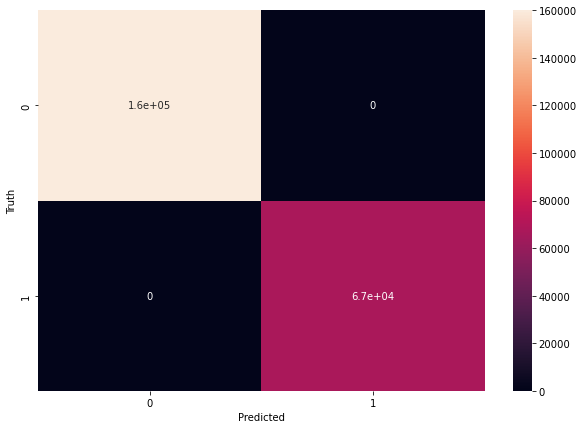

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

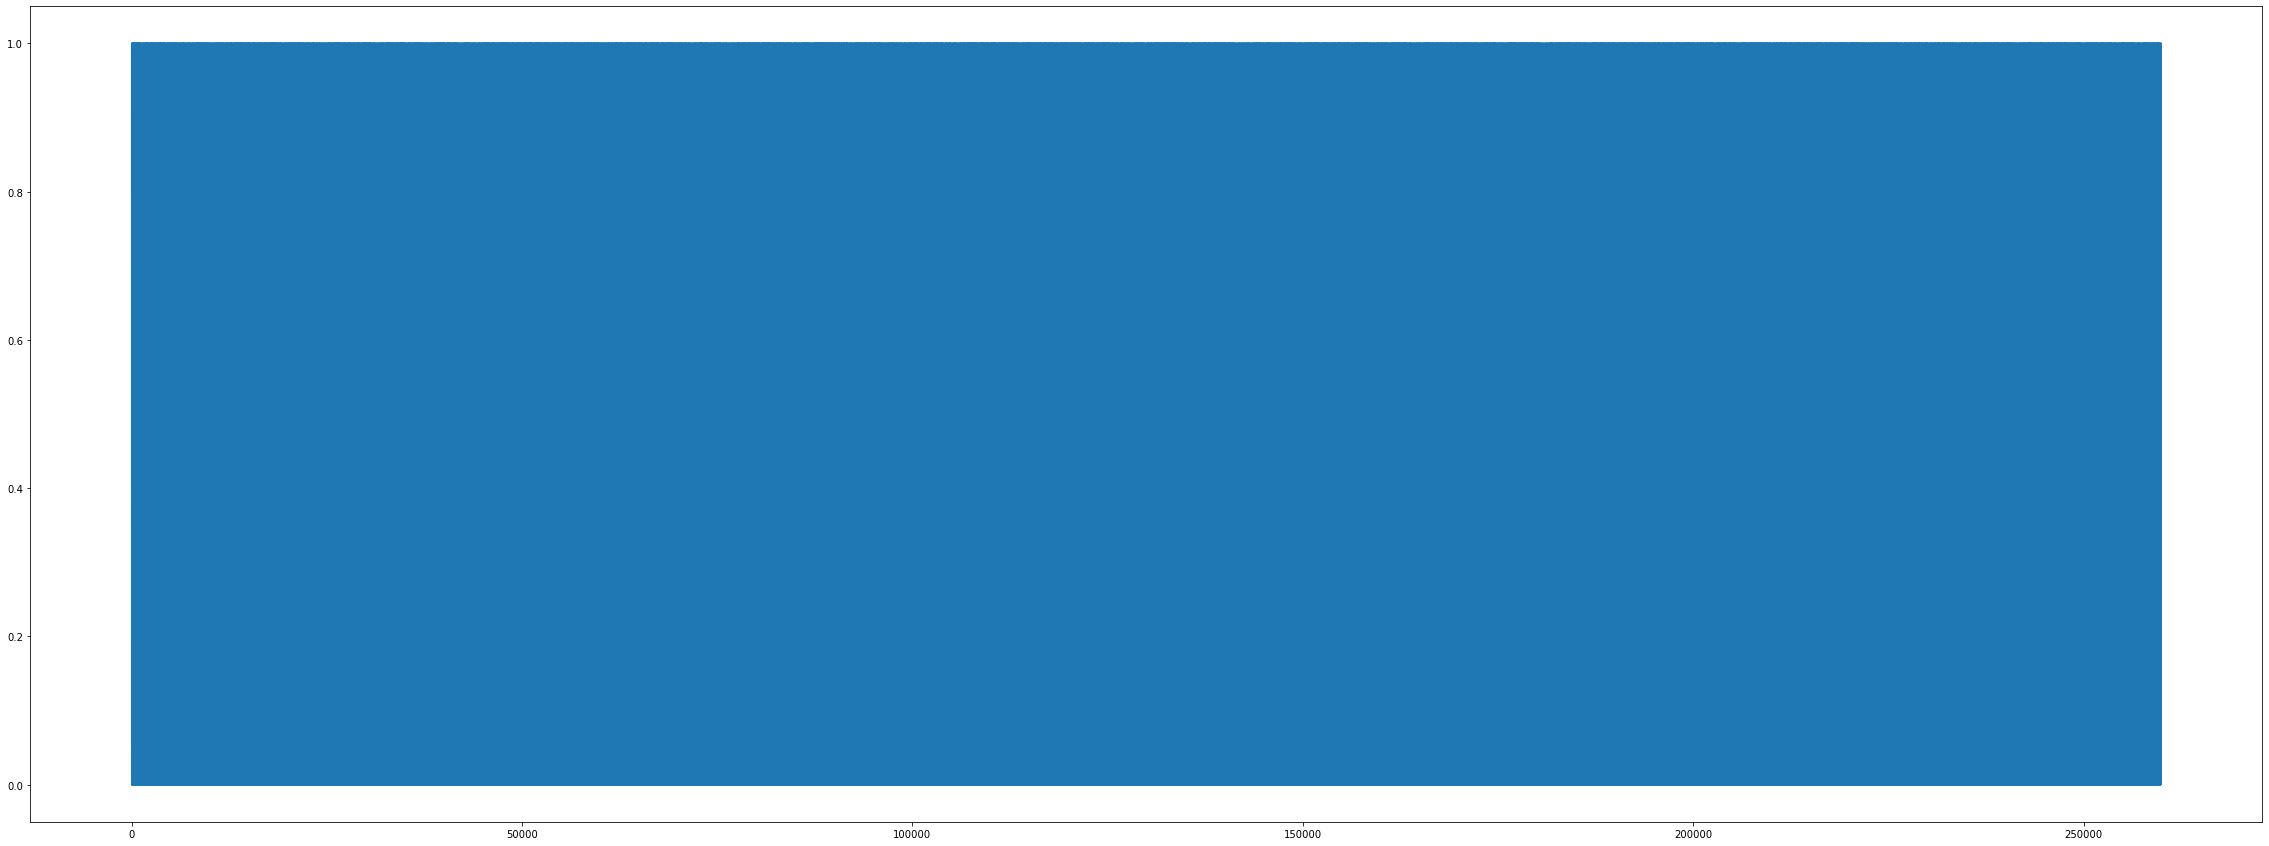

In [39]:
plt.figure(figsize=(40,15))
plt.plot(np.linspace(0,len(y_predicted), len(y_predicted)), y_predicted)

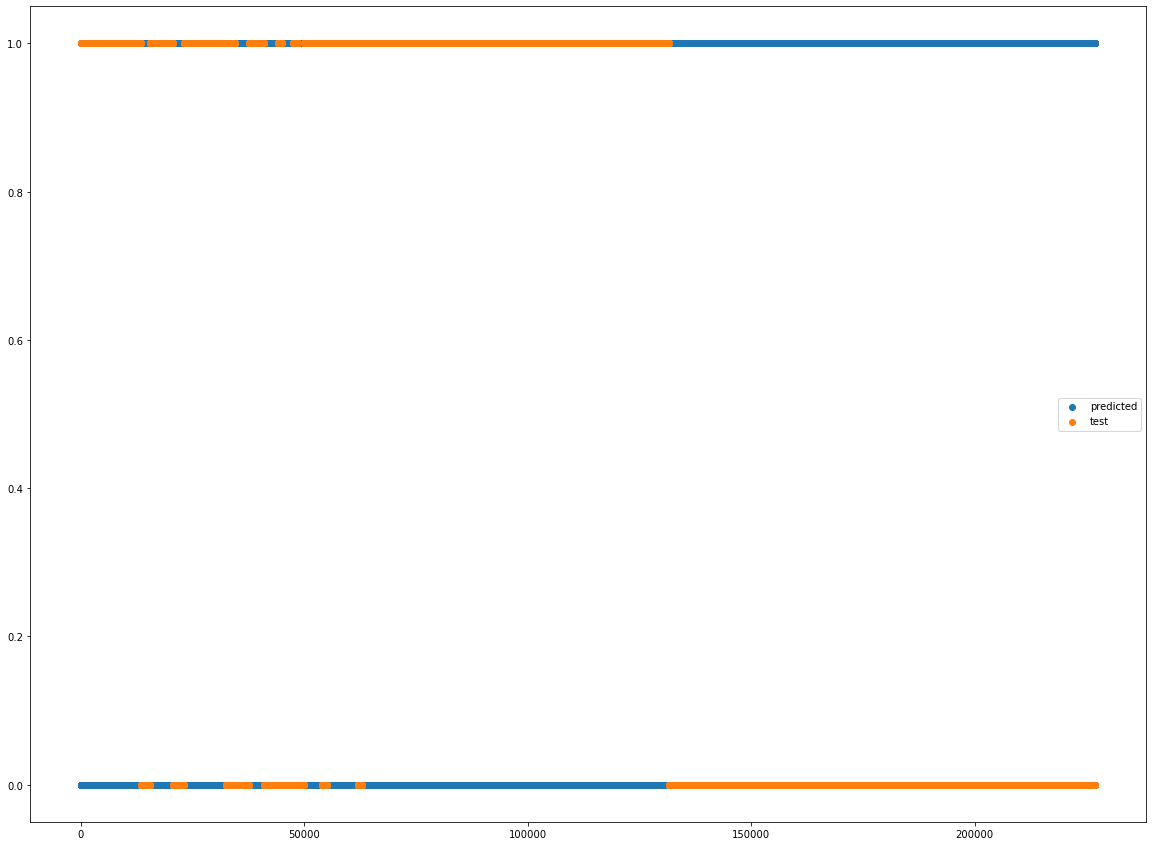

In [145]:
plt.figure(figsize=(20,15))
plt.scatter(np.linspace(0, len(y_predicted), len(y_predicted)), y_predicted, label = "predicted")
plt.scatter(np.linspace(0, len(y_predicted), len(y_predicted)), pd.to_numeric(result[result.columns[56]])[1039504-len(y_test):1039504], label= "test")
#plt.scatter(np.linspace(0, len(y_predicted), len(y_predicted)), y_test, label = "test")
plt.legend(loc = "center right")
#plt.plot(np.linspace(0, len(y_predicted), len(y_predicted)), y_predicted, label = "predicted")
#plt.plot(np.linspace(0, len(y_predicted), len(y_predicted)), y_test, label = "test")

In [146]:
def pas_la_meme(test, predicted):
    test_ = []
    predicted_ = []
    for j in range(len(test)):
        if test[j] != predicted[j]:
            test_.append(test[j])
            predicted_.append(predicted[j])
    return (test_, predicted_)

print(len(pas_la_meme(y_test.to_list(), y_predicted)[0]))
print(1-len(pas_la_meme(y_test.to_list(), y_predicted)[0])/len(y_predicted))

80785
0.6441205104823327


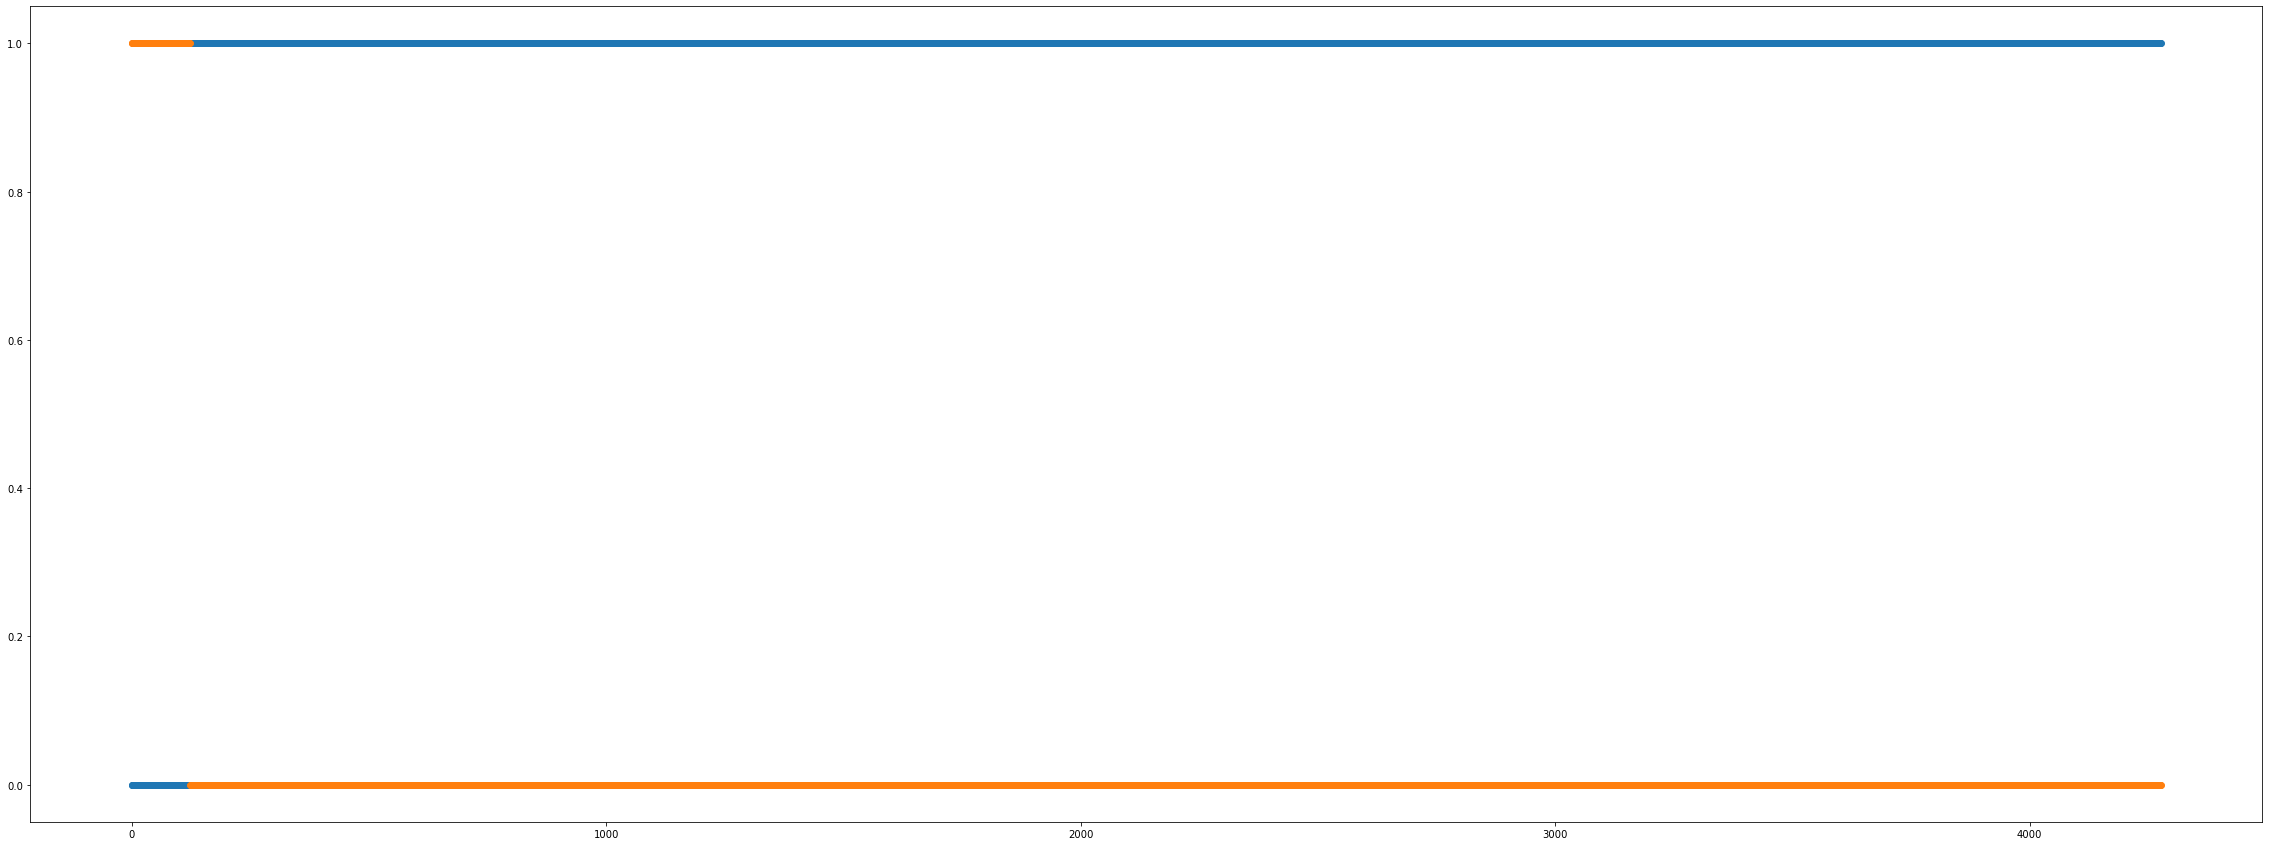

In [32]:
(test_, pred_) = pas_la_meme(y_test.to_list(), y_predicted)
plt.figure(figsize=(40,15))
plt.scatter(np.linspace(0, len(pred_), len(pred_)), pred_, label = "predicted_diff")
plt.scatter(np.linspace(0, len(test_), len(test_)), test_, label = "test_diff")